<h1 style="text-align:center">Module 6 Assessment</h1>

Welcome to your Mod 6 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. Topics in this assessment include graph theory, natural language processing, and neural networks. 

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts is more important than getting the best model.

Use any libraries you want to solve the problems in the assessment. 

You will have up to 90 minutes to complete this assessment. 

The sections of the assessment are:

* Natural Language Processing
* Network Analysis
* Perceptrons and Multi-Layer Perceptrons
* Regularization and Optimization of Neural Networks

## Natural Language Processing

In this exercise we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization. Once we successfully classify our texts we will examine our results to see which words are most important to each class of text messages. 

Complete the functions below and answer the question(s) at the end. 

In [ ]:
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

In [9]:
# __SOLUTION__ 
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
#read in data
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

In [10]:
# __SOLUTION__ 
#read in data
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

In [ ]:
#convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

In [11]:
# __SOLUTION__ 
#convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

In [ ]:
#examine or data
df_messages.head()

In [12]:
# __SOLUTION__ 
#examine or data
df_messages.head()

v1                                                 v2  target
0   ham  Go until jurong point, crazy.. Available only ...       0
1   ham                      Ok lar... Joking wif u oni...       0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       1
3   ham  U dun say so early hor... U c already then say...       0
4   ham  Nah I don't think he goes to usf, he lives aro...       0

### TF-IDF

In [ ]:
#separate features and labels 
X = df_messages['v2']
y = df_messages['target']


In [13]:
# __SOLUTION__ 
#separate features and labels 
X = df_messages['v2']
y = df_messages['target']


In [ ]:
#generate a list of stopwords 
stopwords_list = stopwords.words('english') + list(string.punctuation)


In [14]:
# __SOLUTION__ 
#generate a list of stopwords 
stopwords_list = stopwords.words('english') + list(string.punctuation)


<b>1) Let's create a function that takes in our various texts along with their respective labels and uses TF-IDF to vectorize the texts.  Recall that TF-IDF helps us "vectorize" text (turn text into numbers) so we can do "math" with it.  It is used to reflect how relevant a term is in a given document in a numerical way. </b>

In [ ]:
#generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data
def tfidf(X, y,  stopwords_list): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    Parameters
    ----------
    X: pandas.Series object
        Pandas series of text documents to classify 
    y : pandas.Series object
        Pandas series containing label for each document
    stopwords_list: list ojbect
        List containing words and punctuation to remove. 
    Returns
    --------
    tf_idf_train :  sparse matrix, [n_train_samples, n_features]
        Vector representation of train data
    tf_idf_test :  sparse matrix, [n_test_samples, n_features]
        Vector representation of test data
    y_train : array-like object
        labels for training data
    y_test : array-like object
        labels for testing data
    vectorizer : vectorizer object
        fit TF-IDF vecotrizer object

    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    pass

In [15]:
# __SOLUTION__ 
#generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [ ]:
tf_idf_train, tf_idf_test, y_train, y_test, vecotorizer = tfidf(X, y, stopwords_list)

In [16]:
# __SOLUTION__ 
tf_idf_train, tf_idf_test, y_train, y_test, vecotorizer = tfidf(X, y, stopwords_list)

### Classification

<b>2) Now that we have a set of vectorized training data we can use this data to train a classifier to learn how to classify a specific text based on the vectorized version of the text. Below we have initialized a simple Naive Bayes Classifier and Random Forest Classifier. Complete the function below which will accept a classifier object, a vectorized training set, vectorized test set, and list of training labels and return a list of predictions for our training set and a separate list of predictions for our test set.</b> 

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [17]:
# __SOLUTION__ 
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    '''
    Train a classifier to identify whether a message is spam or ham
    
    Parameters
    ----------
    classifier: sklearn classifier
       initialized sklearn classifier (MultinomialNB, RandomForestClassifier, etc.)
    tf_idf_train : sparse matrix, [n_train_samples, n_features]
        TF-IDF vectorization of train data
    tf_idf_test : sparse matrix, [n_test_samples, n_features]
        TF-IDF vectorization of test data
    y_train : pandas.Series object
        Pandas series containing label for each document in the train set
    Returns
    --------
    train_preds :  list object
        Predictions for train data
    test_preds :  list object
        Predictions for test data
    '''
    #fit the classifier with our training data
    
    #predict the labels of our train data and store them in train_preds
    
    #predict the labels of our test data and store them in test_preds
    pass

In [18]:
# __SOLUTION__ 
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    classifier.fit(tf_idf_train, y_train)
    train_preds = classifier.predict(tf_idf_train)
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds

In [ ]:
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,tf_idf_train, tf_idf_test, y_train)

In [19]:
# __SOLUTION__ 
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,tf_idf_train, tf_idf_test, y_train)

In [ ]:
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

In [20]:
# __SOLUTION__ 
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

[[1202    0]
 [  44  147]]
0.968413496051687


In [ ]:
#generate predictions for Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier,tf_idf_train, tf_idf_test, y_train)

In [21]:
# __SOLUTION__ 
#generate predictions for Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier,tf_idf_train, tf_idf_test, y_train)

In [ ]:
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

In [22]:
# __SOLUTION__ 
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

[[1201    1]
 [  33  158]]
0.9755922469490309


You can see both classifiers do a pretty good job classifying texts as either "SPAM" or "HAM". Let's figure out which words are the most important to each class of texts! Recall that Inverse Document Frequency can help us determine which words are most important in an entire corpus or group of documents. 

<b>3) Create a function that calculates the IDF of each word in our collection of texts.</b>

In [ ]:
def get_idf(class_, df, stopwords_list):
    '''
    Get ten words with lowest IDF values representing 10 most important
    words for a defined class (spam or ham)
    
    Parameters
    ----------
    class_ : str object
        string defining class 'spam' or 'ham'
    df : pandas DataFrame object
        data frame containing texts and labels
    stopwords_list: list object
        List containing words and punctuation to remove. 
    --------
    important_10 : pandas dataframe object
        Dataframe containing 10 words and respective IDF values
        representing the 10 most important words found in the texts
        associated with the defined class
    '''
    #generate series containing all texts associated with the defined class
    docs = 'code here'
    
    #initialize dictionary to count document frequency 
    # (number of documents that contain a certain word)
    class_dict = {}
    
    #loop over each text and split each text into a list of its unique words 
    for doc in docs:
        words = set(doc.split())
        
        #loop over each word and if it is not in the stopwords_list add the word 
        #to class_dict with a value of 1. if it is already in the dictionary
        #increment it by 1
        
    #take our dictionary and calculate the 
    #IDF (number of docs / number of docs containing each word) 
    #for each word and return the 10 words with the lowest IDF 
    pass

In [23]:
# __SOLUTION__ 
def get_idf(class_, df, stopwords_list):
    docs = df[df.v1==class_].v2
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = len(docs)/idf_df.IDF
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(10)

In [ ]:
get_idf('spam', df_messages, stopwords_list)

In [24]:
# __SOLUTION__ 
get_idf('spam', df_messages, stopwords_list)

IDF
call    2.277439
free    4.698113
txt     5.574627
2       5.746154
ur      6.073171
u       7.047170
mobile  7.114286
text    7.114286
claim   7.182692
reply   7.781250

In [ ]:
get_idf('ham', df_messages, stopwords_list)

In [25]:
# __SOLUTION__ 
get_idf('ham', df_messages, stopwords_list)

IDF
u           7.310606
i'm        14.067055
get        17.481884
2          20.188285
go         22.133028
got        22.133028
&lt;#&gt;  22.546729
like       23.309179
call       23.309179
come       23.651961

### Explain
<b> 4) Imagine that the word "school" has the highest TF-IDF value in the second document of our test data. What does that tell us about the word school? </b>

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Answer: The word, school is very unique. It is not found frequently across 
# many documents but its present in the second document meaning it has significant importance to this document.

## Network Analysis

For these next questions, you'll be using a graph dataset of facebook users and networkx. In the next cell, we're going to read in the dataset.

In [ ]:
import networkx as nx
G = nx.read_edgelist('./data/0.edges')

In [26]:
# __SOLUTION__ 
import networkx as nx
G = nx.read_edgelist('./data/0.edges')

###### 1) Create a function `find_centrality` that returns a dictionary with the user with the highest betweenness centrality and the user with the highest degree centrality. It should return a dictionary that looks like:


{'bc' : |user|, 'dc' : |user|}

In [ ]:
def find_centrality(graph):
    """
    Calculates the most central nodes on a graph
    
    Parameters
    ----------
    graph: networkx Graph object
        Graph object to be analyzed
    Returns
    --------
    centrality_dict : dict
        A dictionary with the highest ranked user based off degree centrality and betweenness centrality 
    """
    pass

In [27]:
# __SOLUTION__ 
def find_centrality(graph):
    bc = nx.algorithms.centrality.betweenness_centrality(graph)
    max_bc = max(bc.items(), key = lambda kv : kv[1] )
    print('betweenness centrality: ',max_bc)
    dc = nx.algorithms.centrality.degree_centrality(graph)
    max_dc = max(dc.items(), key= lambda kv : kv[1])
    print('degree centrality: ', max_dc)
    centrality_dict = {'bc':max_bc[0],'dc':max_dc[0]}
    return centrality_dict

#### 2) How does each of these people wield influence on the network? Imagine a message had to get to people from different communities. Who would be the best user to deliver the message to ensure that people from opposite communities receive the message?

In [28]:
# __SOLUTION__ 
find_centrality(G)

betweenness centrality:  ('277', 0.2658578437822957)
degree centrality:  ('56', 0.23192771084337352)


{'bc': '277', 'dc': '56'}

// answer here //

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# The user with the highest degree centrality has the most overall connections.
# The user with the highest betweenness centrality has the most connections go through them. 
# The user with the highest betweenness centrality (277) would be the best person to
# ensure that people from disparate communities receive the message.

#### 3) A marketing group is looking to target different communities with advertisements based off of their assumed mutual interests. 

#### Use the `k_cliques_communities` method to calculate the number of cliques formed with k users in a function `find_k_communities`. Calculate how many communities there are if the minimum size of a clique is 5.


In [ ]:
def find_k_communities(graph,k):
    """
    Parameters
    ----------
    graph: networkx Graph object
        
    k : int
        k-number of connections required for a clique
    
    Returns
    -------
    num_communities: int
        The number of communities present in the graph
    """
    pass

In [29]:
# __SOLUTION__ 
def find_k_communities(graph, k):
    return len(list(nx.algorithms.community.kclique.k_clique_communities(graph, k)))

In [31]:
# __SOLUTION__ 
find_k_communities(G, 5)

12

## Perceptrons and Multi Layer Perceptrons

In the first neural network portion of this assessment, you are going to start off by answering questions related to the mechanics of basic neural networks. After, you will look at various ways of tuning neural networks by way of regularization and optimization. To start off with, we are going to import all the libraries that you might need for the questions in this section.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_gaussian_quantiles, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential, regularizers
from keras.layers import Dense
from keras.initializers import RandomNormal

In [7]:
# __SOLUTION__ 
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_gaussian_quantiles, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential, regularizers
from keras.layers import Dense
from keras.initializers import RandomNormal

/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<center><b>The Sigmoid Function</b></center>
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

<center><b>A Diagram of Simple Perceptron</b></center>

<img src='images/perceptron.png'/>

##### 1) What are the inputs and outputs of a perceptron?

// answer here //

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Inputs are either exogenous variables or outputs of other perceptrons. 
# The output is the result of the multiplication of weights and biases, the addition of a bias term, 
# and then transformation via an activation function e.g. the sigmoid function.

##### 2) We've completed the sigmoid function for you. Let's create a function that takes in an array of inputs (x) along with predefined weights (w), a bias (b) and returns the output of a perceptron. 

In [ ]:
def sigmoid(input_):
    """
    Transforms an input using the sigmoid function given above
    
    Parameters
    ----------
    input_: input to be transformed
    
    Returns
    --------
    output : float
        result of the application of the sigmoid function 
    """
    
    return 1/(1+np.exp(-1*input_))

In [5]:
# __SOLUTION__ 
def sigmoid(input_function):
    return 1/(1+np.exp(-1*input_function))

In [ ]:
def perceptron_output(x,w,b):
    """
    Caluclates the perceptron output. Should use sigmoid as a helper function.
    
    Parameters
    ----------
    x : np.array
        perceptron inputs
    w : np.array
        perceptron input weights
    b : float
        bias term
    
    Returns
    --------
    y : float
        final output of the perceptron
    """
    
    pass

In [1]:
# __SOLUTION__ 
def perceptron_output(x,w,b):
    
    return sigmoid(np.sum(np.multiply(x,w)+b))

In [ ]:
x = [1, .19, 1]
w = [.2, .9, .75]
b = 0.5

In [2]:
# __SOLUTION__ 
x = [1, .19, 1]
w = [.2, .9, .75]
b = 0.5

In [ ]:
perceptron_output(x,w,b)

In [8]:
# __SOLUTION__ 
perceptron_output(x,w,b)

0.9322009360964977

<center><b>Diagram of a Multi Layer Perceptron</b></center>

<img src='images/Deeper_network_day2.png'/>

##### 3) Describe the process of forward propagation in neural networks

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Outputs of each perceptron are propagated to each node of the next layer and scaled by weights specific to each of these connections.

##### 4) How does what happens in forward-propagation change what happens in back-propagation? Be as specific as possible.

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Each time the neural network propagates forward for a given batch, there are residuals due to inaccuracy. 
# To update the weights and biases in the network, the derivatives of each term are calculated using 
# these residuals and then simultaneously updated using the process of gradient descent.

##### 5) Imagine you are trying classifying audio files into five different classes of sounds. What should your activation function be in the output layer and why? 

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# This is a multi-label problem. There should be one output for each label. 
# If a specific output node is over a certain threshold, then that node's label is assigned to that observation.
# The activation function should be a soft max activation.

## Regularization and Optimization of Neural Networks

Now you're going to train full neural networks on a _small_ set of data. It is a binary classification problem in which you need to identify whether or not a dot will belong to the teal or orange class.

In [ ]:
np.random.seed(0)
# generate 2d classification dataset
X, y = make_circles(n_samples=450, noise=0.12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'teal', 1:'orange'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key != 2:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

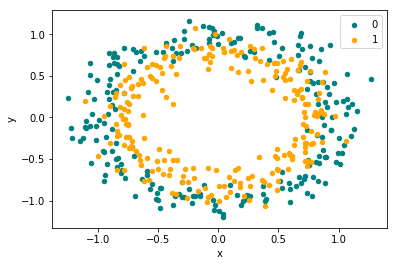

In [6]:
# __SOLUTION__ 
np.random.seed(0)
# generate 2d classification dataset
X, y = make_circles(n_samples=450, noise=0.12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'teal', 1:'orange'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key != 2:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In the two cells below, the set of data has been split into a training and testing set and then fit to a neural network with two hidden layers. Run the two cells below to see how well the model performs.

In [ ]:
#train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# __SOLUTION__ 
#train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
np.random.seed(0)

#Instantiate Classifier
classifier = Sequential()

#Hidden Layer
classifier.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Hidden Layer
classifier.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Output Layer
classifier.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))


# TEST

#predict classess
predicted_vals_test = classifier.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))

In [ ]:
# __SOLUTION__ 
np.random.seed(0)

#Instantiate Classifier
classifier = Sequential()

#Hidden Layer
classifier.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Hidden Layer
classifier.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Output Layer
classifier.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))


# TEST

#predict classess
predicted_vals_test = classifier.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##### 1) Modify the code below to use L2 regularization


The model appears to be overfitting. To deal with this overfitting, modify the code below to include L2 regularization in the model. 

In [ ]:
np.random.seed(0)

#Instantiate Classifier
classifier2 = Sequential()

#Hidden Layer
classifier2.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Hidden Layer
classifier2.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Output Layer
classifier2.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier2.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier2.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier2.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))

# TEST

#predict classess
predicted_vals_test = classifier2.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))


In [ ]:
# __SOLUTION__ 
np.random.seed(0)

#Instantiate Classifier
classifier2 = Sequential()

#Hidden Layer
classifier2.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Hidden Layer
classifier2.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Output Layer
classifier2.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier2.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier2.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier2.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))

# TEST

#predict classess
predicted_vals_test = classifier2.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))


Did the regularization you performed prevent overfitting?

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Yes, it did prevent overfitting, we know this because the testing accuracy has improved, even though the training accuracy decreased.

##### 2) Explain how regularization is related to the bias/variance tradeoff within Neural Networks and how it's related to the results you just achieved in the training and test accuracies of the previous models. What does regularization change in the training process (be specific to what is being regularized and how it is regularizing)?


In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# Regularization helps prevent over fitting by adding penalty terms to the cost function. 
# This prevents any one feature to having too much importance in a model.

##### 3) How might L1  and dropout regularization change a neural network's architecture?

In [ ]:
# Your answer here

In [ ]:
# __SOLUTION__
# L1 and dropout regularization may eliminate connections between nodes entirely.